In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "fraudTrain.csv" 
data = pd.read_csv(file_path)

In [48]:
# 2. Structure and Metadata
print(data.columns)
print("\nDataset Size:")
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")
print("\nStatistical Summary:")
print(data.describe())

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Dataset Size:
Number of rows: 1296675, Number of columns: 23

Statistical Summary:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.

In [49]:
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)



Missing Values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64



Feature Insights and Anomalies:


C:\Users\Owner\AppData\Local\Temp\ipykernel_62816\162308429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_hour['hour'], y=fraud_by_hour['is_fraud'], palette="viridis")


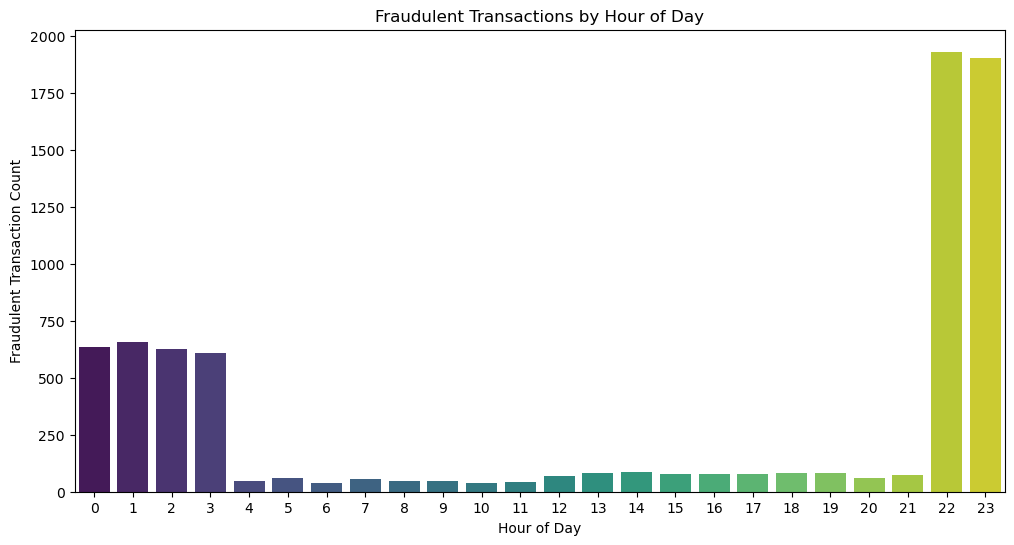

C:\Users\Owner\AppData\Local\Temp\ipykernel_62816\162308429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="is_fraud", y="amt", palette="coolwarm")


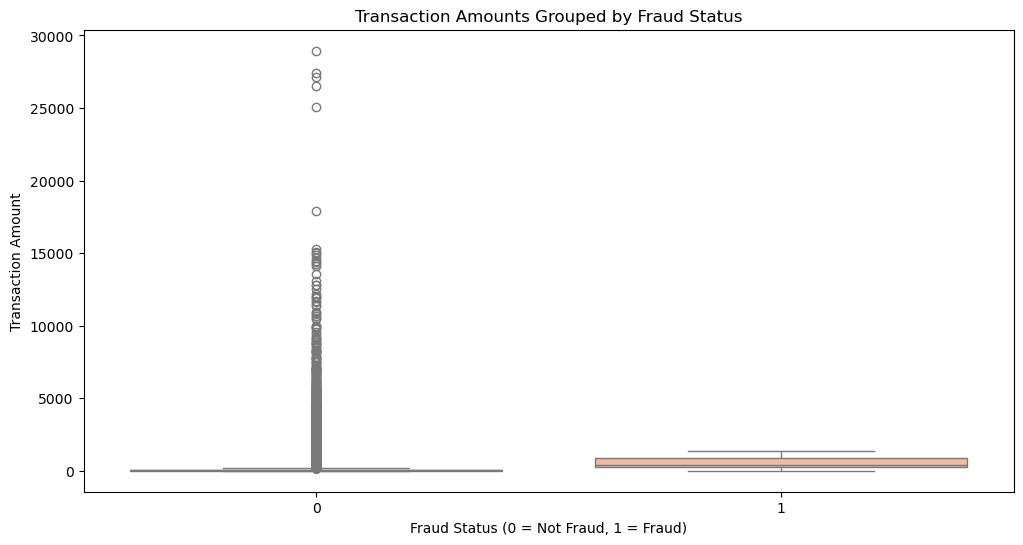

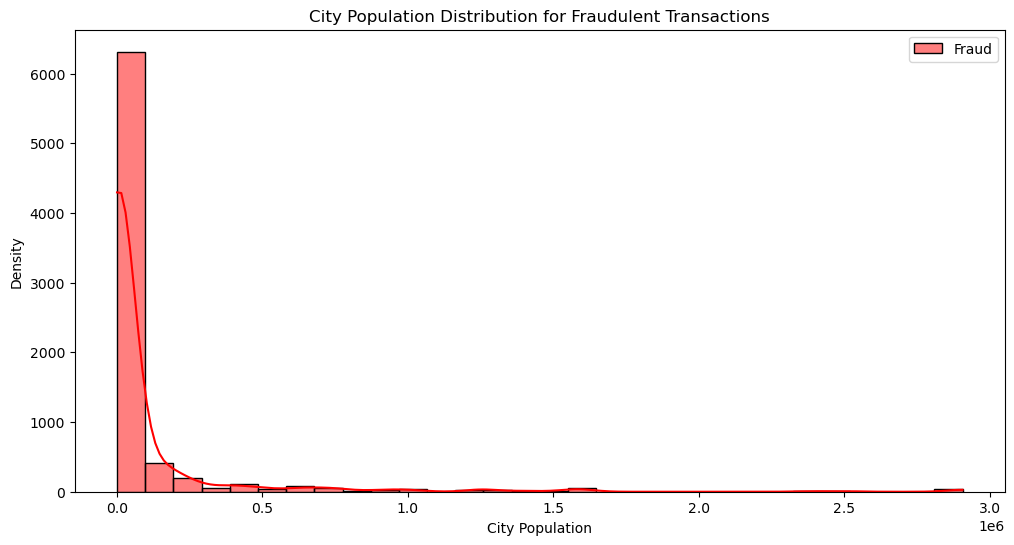

In [ ]:
# 4. Feature Insights and Anomalies
print("\nFeature Insights and Anomalies:")

#  fraudulent transactions by hour 
data['hour'] = pd.to_datetime(data['trans_date_trans_time']).dt.hour
fraud_by_hour = data[data['is_fraud'] == 1].groupby('hour')['is_fraud'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_by_hour['hour'], y=fraud_by_hour['is_fraud'], palette="viridis")
plt.title("Fraudulent Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fraudulent Transaction Count")
plt.show()

# Transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="is_fraud", y="amt", palette="coolwarm")
plt.title("Transaction Amounts Grouped by Fraud Status")
plt.xlabel("Fraud Status (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

# City population
fraud_data = data[data['is_fraud'] == 1]
non_fraud_data = data[data['is_fraud'] == 0]

# Fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(fraud_data['city_pop'], kde=True, bins=30, color='red', label='Fraud')
plt.title("City Population Distribution for Fraudulent Transactions")
plt.xlabel("City Population")
plt.ylabel("Density")
plt.legend()
plt.show()

# Non fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(non_fraud_data['city_pop'], kde=True, bins=30, color='blue', label='Non-Fraud')
plt.title("City Population Distribution for Non-Fraudulent Transactions")
plt.xlabel("City Population")
plt.ylabel("Density")
plt.legend()
plt.show()

# Geographic scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="merch_long", y="merch_lat", hue="is_fraud", alpha=0.6, palette="coolwarm")
plt.title("Merchant Locations by Fraud Status")
plt.xlabel("Merchant Longitude")
plt.ylabel("Merchant Latitude")
plt.show()

# highlighting for features
for col in ["amt", "city_pop"]: 
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x="is_fraud", y=col, palette="coolwarm")
    plt.title(f"Boxplot of {col} Grouped by Fraud Status")
    plt.xlabel("Fraud Status (0 = Not Fraud, 1 = Fraud)")
    plt.ylabel(col)
    plt.show()



Bias Analysis:


C:\Users\Owner\AppData\Local\Temp\ipykernel_62816\2105433944.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette="coolwarm")


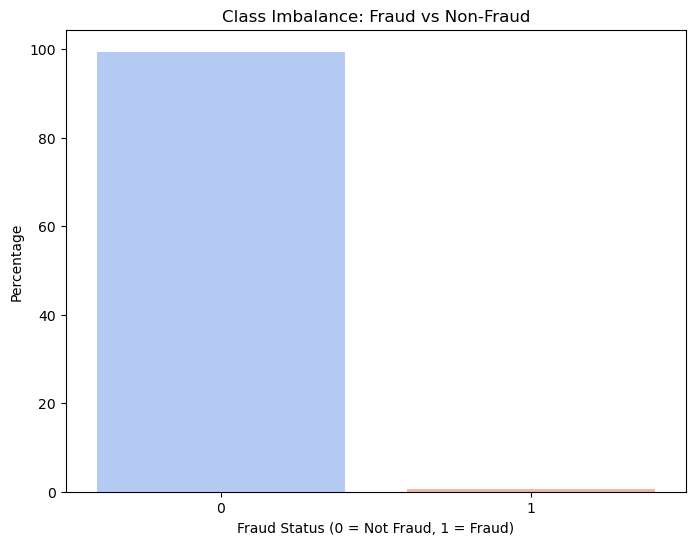

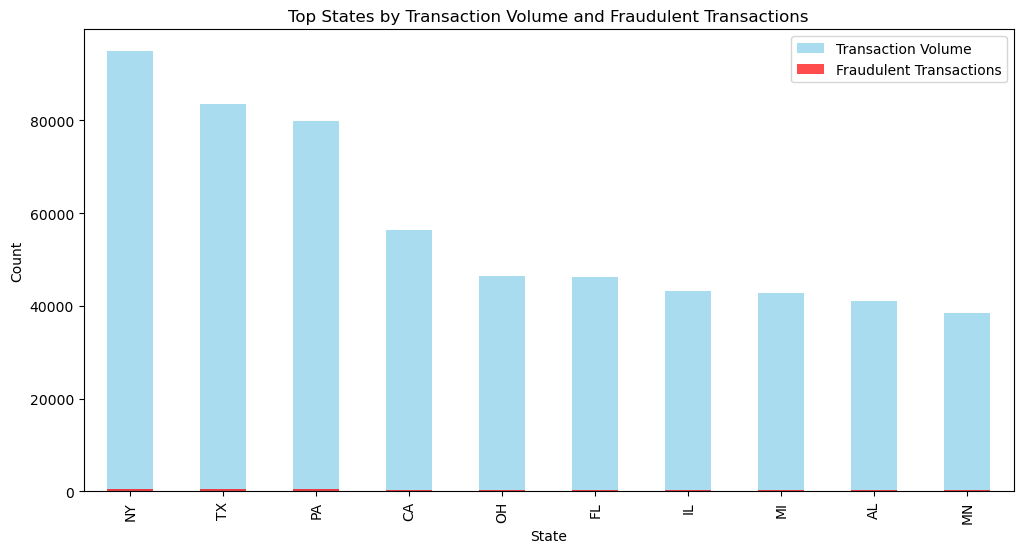

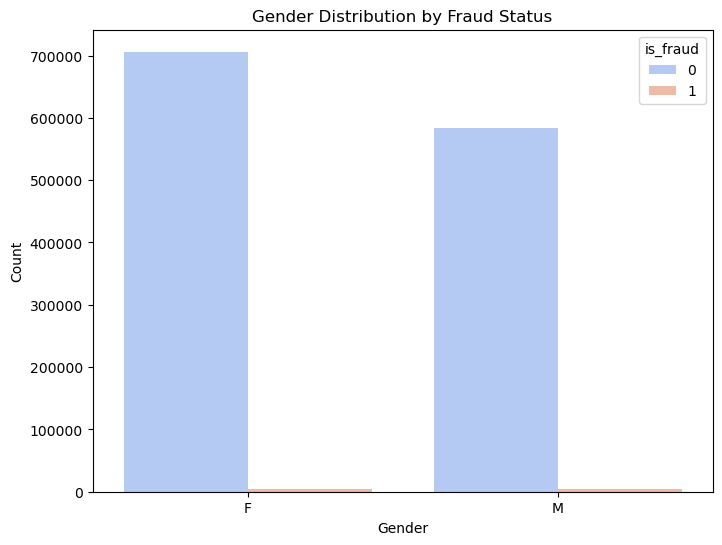

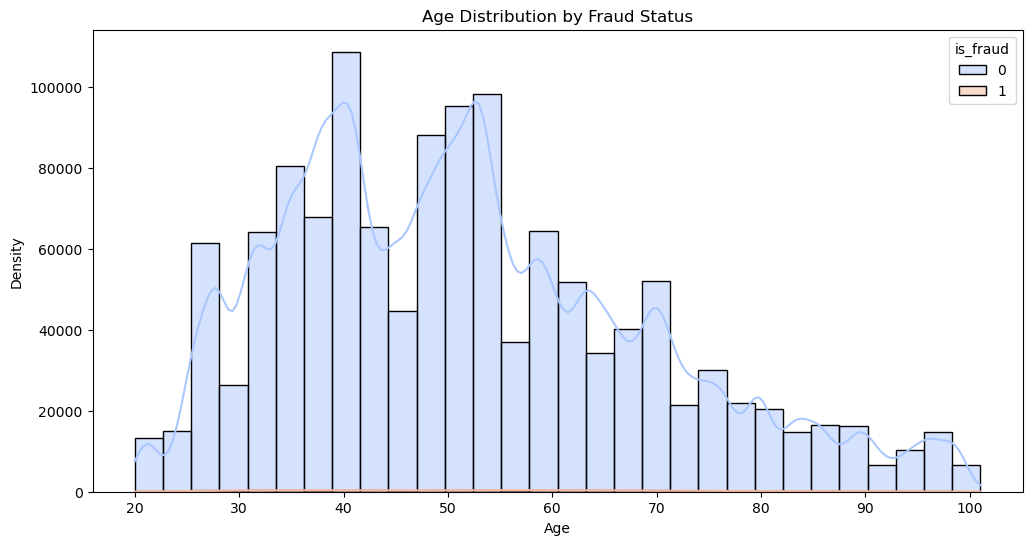

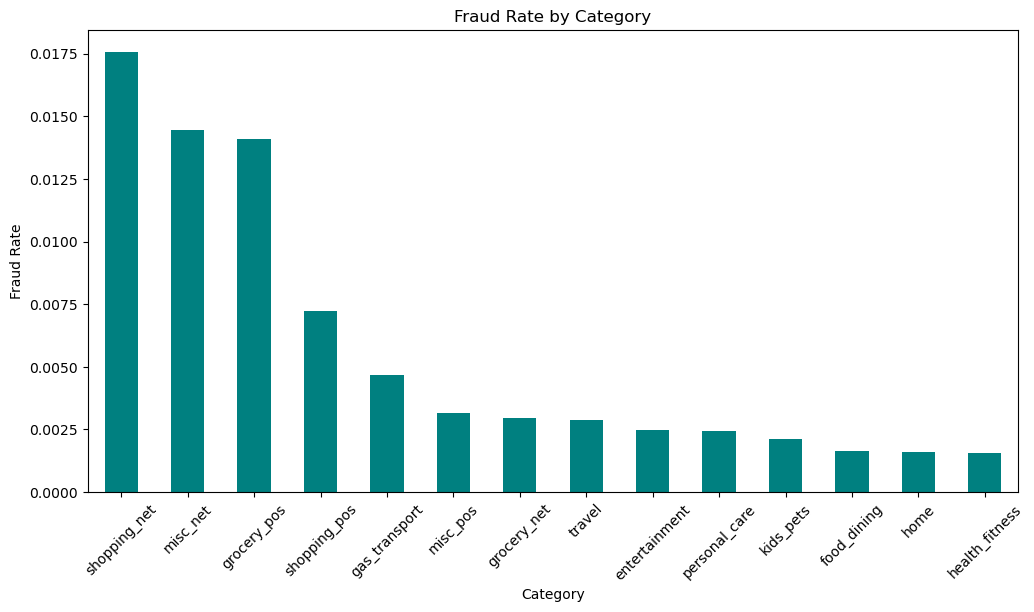

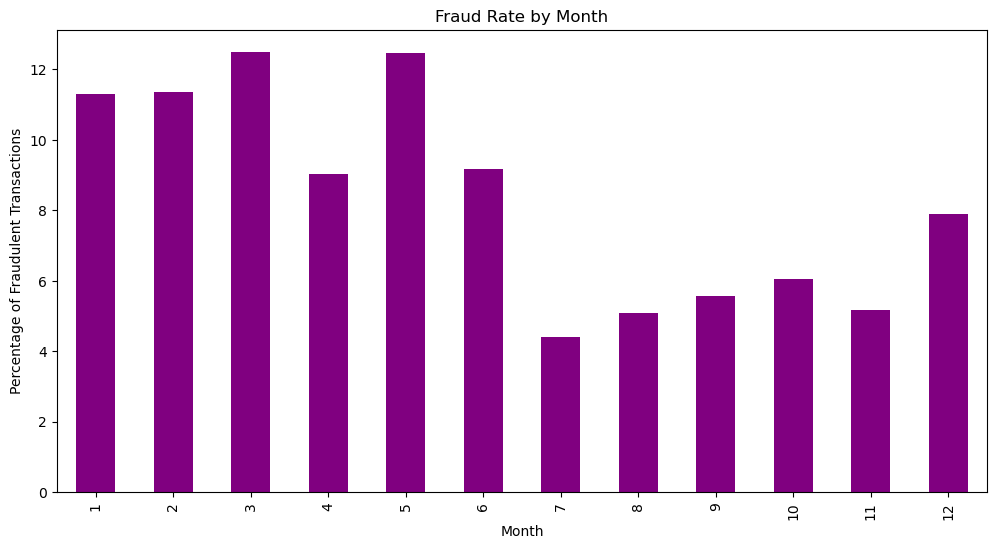

In [ ]:
# 4. Bias Analysis
print("\nBias Analysis:")

# Class Imbalance
fraud_rate = data['is_fraud'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette="coolwarm")
plt.title("Class Imbalance: Fraud vs Non-Fraud")
plt.xlabel("Fraud Status (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Percentage")
plt.show()

# Top states by fraud rate and transaction volume
top_states_by_volume = data['state'].value_counts().head(10)
top_states_by_fraud = data[data['is_fraud'] == 1]['state'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_states_by_volume.plot(kind='bar', color='skyblue', label='Transaction Volume', alpha=0.7)
top_states_by_fraud.plot(kind='bar', color='red', label='Fraudulent Transactions', alpha=0.7)
plt.title("Top States by Transaction Volume and Fraudulent Transactions")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend()
plt.show()

# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='is_fraud', palette="coolwarm")
plt.title("Gender Distribution by Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Age distribution
#data['age'] = 2020 - data['dob'].dt.year
data['age'] = 2020 - pd.to_datetime(data['dob']).dt.year
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='is_fraud', kde=True, palette="coolwarm", bins=30)
plt.title("Age Distribution by Fraud Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# Fraud rates by category
category_fraud_rate = data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_fraud_rate.plot(kind='bar', color='teal')
plt.title("Fraud Rate by Category")
plt.xlabel("Category")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

# Fraud rates by motnh
data['month'] = pd.to_datetime(data['trans_date_trans_time']).dt.month
monthly_fraud_rate = data[data['is_fraud'] == 1]['month'].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(12, 6))
monthly_fraud_rate.plot(kind='bar', color='purple')
plt.title("Fraud Rate by Month")
plt.xlabel("Month")
plt.ylabel("Percentage of Fraudulent Transactions")
plt.show()


Distributions:


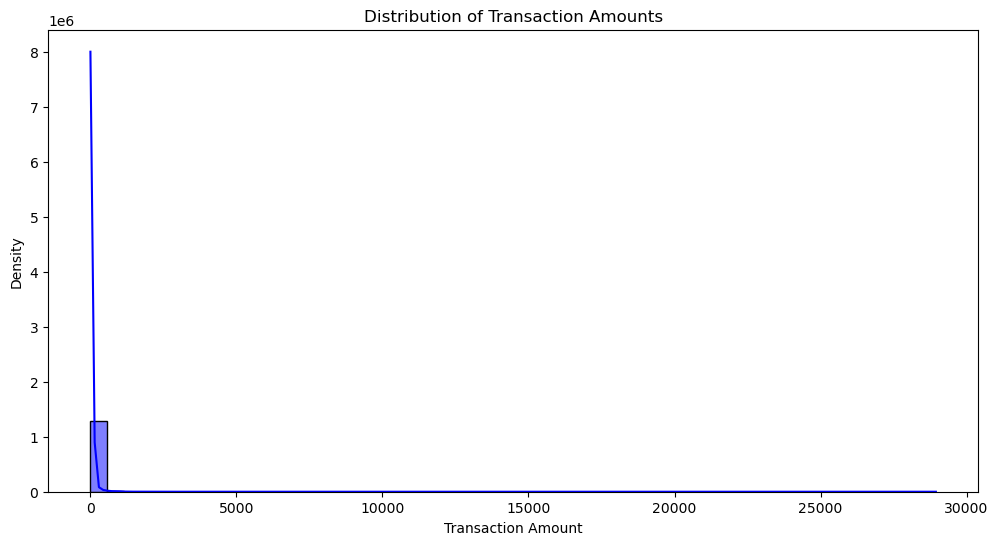

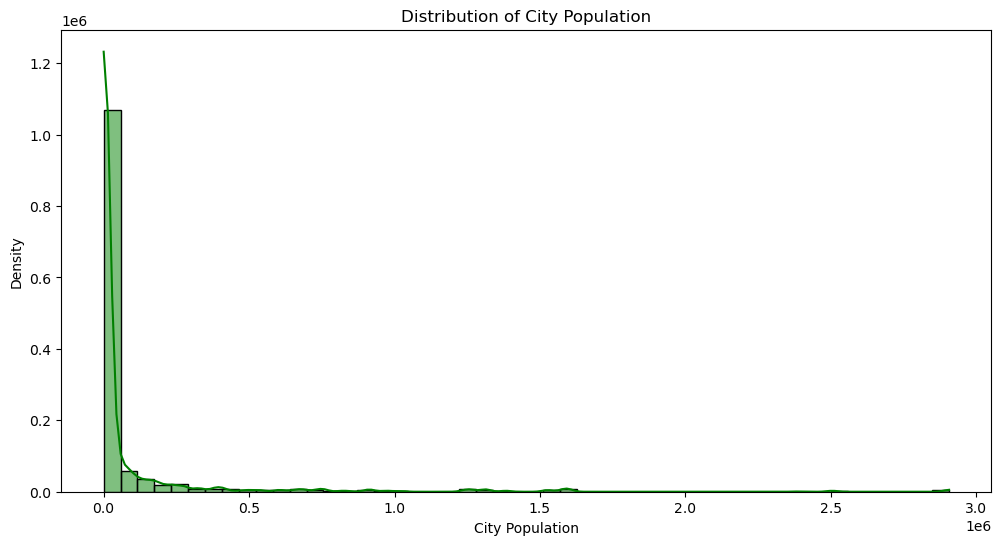

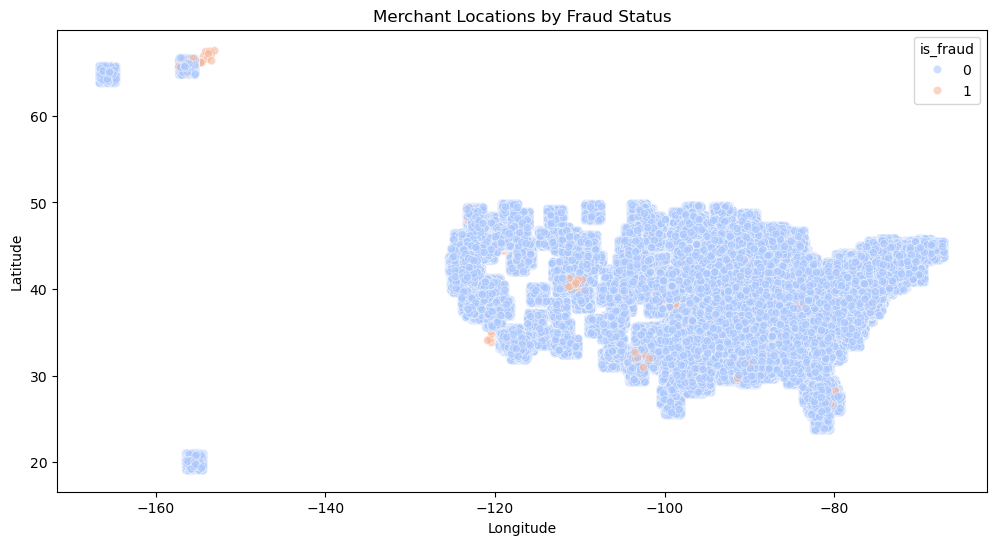

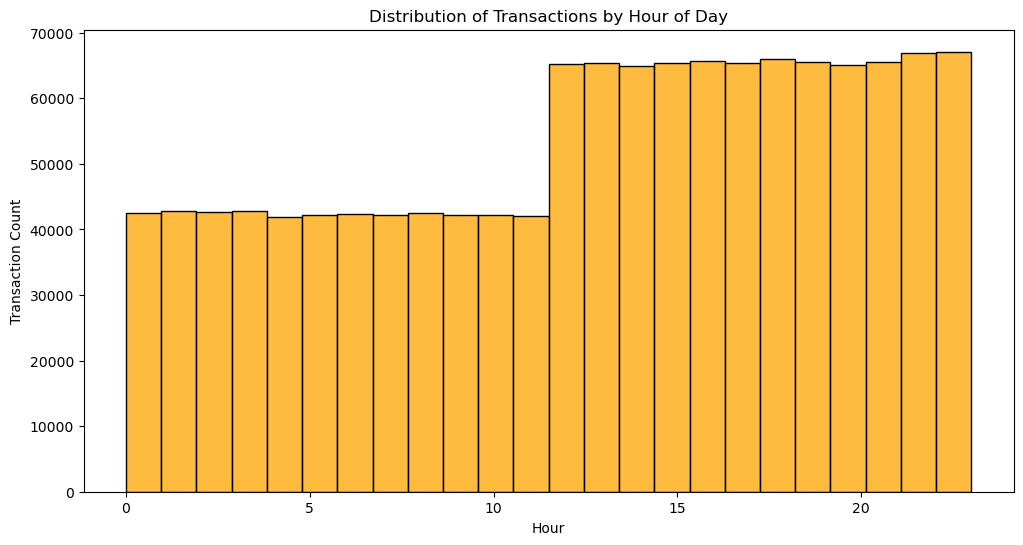


Correlation Matrix:


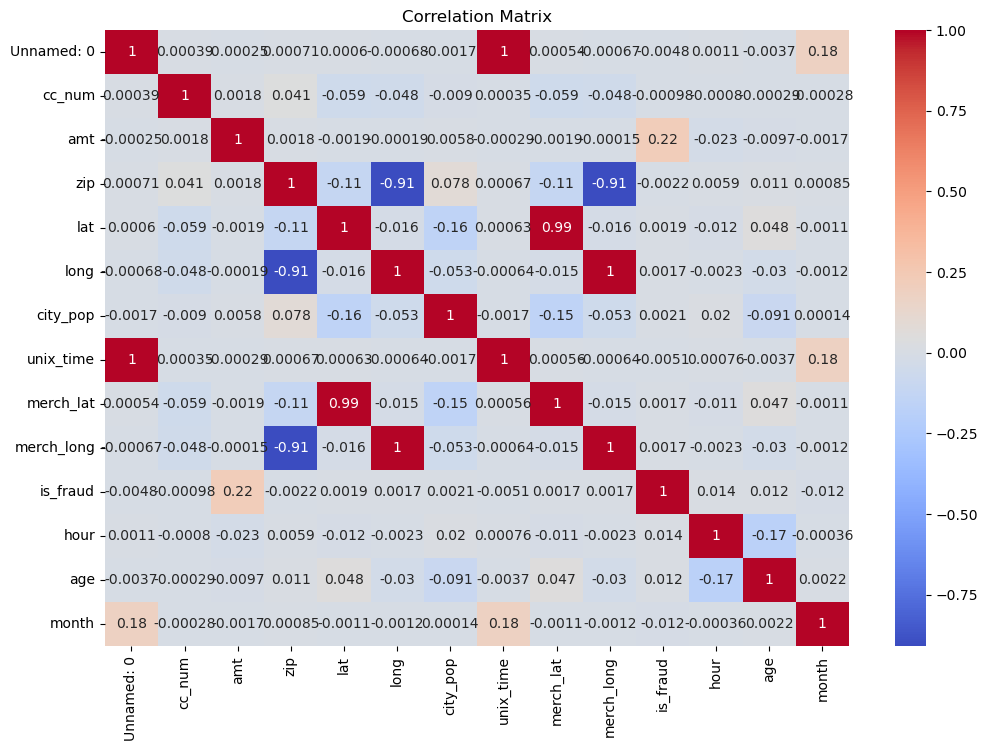

In [ ]:
# 5. Distributions
print("\nDistributions:")

# Transaction amount
plt.figure(figsize=(12, 6))
sns.histplot(data['amt'], kde=True, bins=50, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

# City population
plt.figure(figsize=(12, 6))
sns.histplot(data['city_pop'], kde=True, bins=50, color='green')
plt.title("Distribution of City Population")
plt.xlabel("City Population")
plt.ylabel("Density")
plt.show()

# Merchant locations
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['merch_long'], y=data['merch_lat'], hue=data['is_fraud'], palette="coolwarm", alpha=0.6)
plt.title("Merchant Locations by Fraud Status")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Hourly transaction distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['hour'], bins=24, kde=False, color='orange')
plt.title("Distribution of Transactions by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Transaction Count")
plt.show()

# Correlation matrix
print("\nCorrelation Matrix:")
numerical_data = data.select_dtypes(include=[np.number])  # Select only numerical columns
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_62816\984197926.py:23: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(col_data) if len(col_data) > 1 else 0


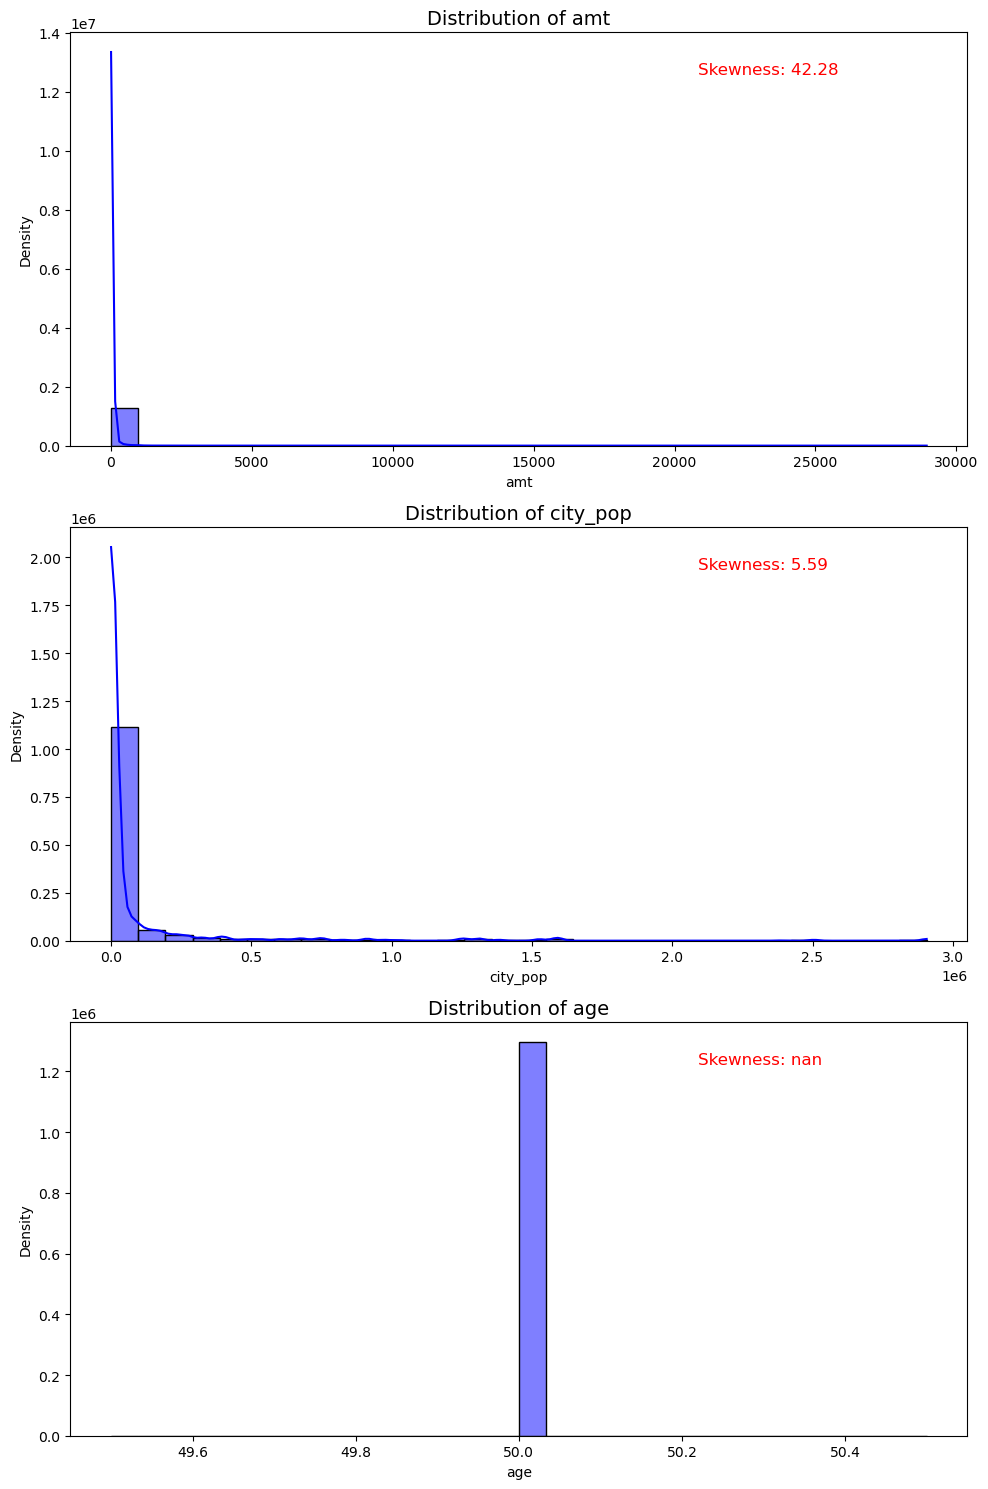

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Define the selected numerical features
selected_features = ['amt', 'city_pop', 'age']

# Create a grid of subplots
num_features = len(selected_features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, num_features * 5))

# Plot each selected feature with skewness annotation
for i, col in enumerate(selected_features):
    col_data = data[col].dropna()  # Drop NaNs before computing skewness

    # Compute skewness safely
    skewness = skew(col_data) if len(col_data) > 1 else 0  

    # Use same plotting approach as your working version
    sns.histplot(data=col_data, kde=True, ax=axes[i], color='blue', bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Annotate skewness below the title
    axes[i].annotate(f"Skewness: {skewness:.2f}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adjust layout
plt.tight_layout()
plt.show()


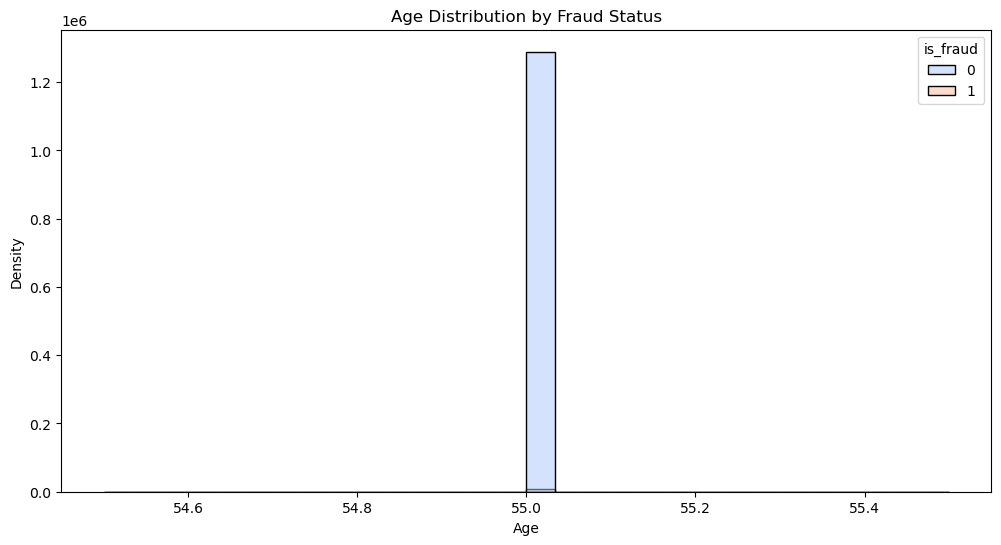